![example](images/director_shot.jpeg)

# ANALYZING MOVIE INDUSTRY : TRENDS AND INSIGHTS FOR A NEW MOVIE STUDIO

**Authors:** Ian Bett, Wambui Kamotho, Felista Kiptoo, Trevor Maina, Habshi Pedro
***

## Overview

The project aims to guide a new movie studio in understanding the key factors that drive box office success, addressing the business problem of identifying profitable genres, optimal budgets, effective release timing, and ideal movie characteristics such as runtime. Using data from IMDB, The Movie Database (TMDb), and The Numbers, we analyzed variables such as production budgets, revenues, genres, release dates, and audience ratings.
Statistical analysis and exploratory data visualization were employed to uncover insights on financial performance, audience preferences, and seasonal trends. Results highlight that certain genres like Action and Adventure have the highest net profit, while the ideal movie budget falls within a specific range to balance profitability and risk. Releasing films during high-demand months (e.g., summer or holiday seasons) and aligning runtime with audience expectations also contribute to success. Recommendations include focusing on high profit genres, maintaining realistic budgets, strategically timing releases, and creating engaging films that resonate with target audiences.

### Business Problem  
Our company is planning to create a new movie studio but lacks experience and insights about the types of movies that perform well at the box office. The goal is to identify the characteristics of successful films and provide actionable insights to guide the company's decisions on the genres, budgets, release strategies, and other factors that maximize box office revenue.

---

### Data Analysis Questions  
To address the business problem, the following questions will guide the data analysis: 

1. **How does release timing (e.g. month) affect box office success?**  
   * Timing the release effectively can capitalize on seasonal trends in audience behavior, to identify the most profitable    months to release a movie.

2. **What is the realistic budget cost amount to consider?**  
   * Understanding this relationship can inform how much the studio should invest in its films for optimal financial performance.

3. **Which genres have the highest ROI and Profit?**  
   * This helps the company to pinpoint genres that deliver the best financial performance..
   
4. **Which genres have the highest Average Rating?**  
   * This enables the company to focus on producing quality films that resonate with audiences based on the specific genres.


5. **What is the appopriate movie length based on Average Rating?**  
   * This analysis helps determine the duration of movies that are most likely to achieve better audience reception and critical acclaim.

---

### Pain Points Related to the Project  
1. **Uncertainty in Market Preferences:** The company has no prior experience in filmmaking, making it difficult to predict what audiences will respond to.  
2. **Financial Risk:** Without proper insights, the studio risks investing heavily in projects that may not perform well.  
3. **Highly Competitive Industry:** The studio must differentiate its offerings in a saturated market where established players dominate.  
4. **Data-Driven Decision-Making:** The company needs reliable insights to make informed choices about genres, budgets, and marketing strategies.

---

### Approach to Choosing Questions  
The questions were selected to address key decision-making areas for a new movie studio: movie release timing, genre selection, budget recommendation & Appropriate movie length. Each question is designed to yield actionable insights by leveraging historical box office and movie industry data.  

By focusing on these areas, the company can mitigate risks and make strategic decisions that align with audience preferences and industry trends.

## Data Understanding  

The data used for this project comes from multiple sources that provide information about movies, their attributes, and box office performance. The sources include IMDB, The Movie Database (TMDb), and The Numbers, each contributing unique and complementary insights. Here's a breakdown of the data and how it relates to the analysis questions:  

---

### Data Sources and Relevance  

1. **IMDB** (SQLite Database - `im.db`):  
   * Contains detailed movie information, including:
     - `movie_basics`: Titles, genres, runtime, and production years.
     - `movie_ratings`: Audience and critic average ratings.  
   * It is useful for understanding the popularity of specific genres, trends in ratings and the impact of runtime based on critic ratimg.

2. **The Movie Database (TMDb)**:  
   * Provides additional metadata about movies, such as genres, movie title, release date, movie vote-count.  
   * It helps to analyze the most appropriate time to release a movie
   
3. **The Numbers**:  
   * Offers box office performance data, including production budget and worldwide gross.  
   * It is central to identifying patterns in box office success, such as net profit and financial return on investment.  

---

### Data Representation  

- The data represents a broad collection of films across multiple decades, including blockbuster hits, independent films, and everything in between.  
- **Variables Included:**  
  - *From `movie_basics`:* Title, genre(s), runtime, release year.  
  - *From `movie_ratings`:* Average rating of critics.  
  - *From The Numbers & TMDb:* Production budget, revenue, release date, cast/crew information.  

---

### Target Variable  

The **target variable** for this analysis is **box office revenue** (international). This metric will measure the success of a film and inform the types of movies to create.  

---

### Properties of Key Variables  

1. **Categorical Variables:**  
   - *Genres*: Multi-label field (e.g., "Action, Adventure").  
   - *Release Timing*: Represented by month or season.  
     

2. **Numerical Variables:**  
   - *Production Budget*: Continuous variable, reflecting investment levels.  
   - *Box Office Revenue*: Continuous variable, representing financial success.  
   - *Ratings*: Continuous variable, ranging from 1-10, capturing audience and critic reception.  

3. **Time Variables:**  
   - *Release Year/Month*: Time-related variables to identify trends and seasonality.  

---

### Data Challenges  

1. **Integration:**  
   - Data must be merged across sources using common keys like movie titles or unique identifiers.  

2. **Quality Issues:**  
   - Missing data in budget, revenue .  
   - Inconsistent formats between sources (e.g., genres listed differently).  

3. **Normalization:**  
   - Variables like budget and revenue may need inflation adjustments for accurate comparisons across years.  

---

### Next Steps  

1. Explore the structure of the `im.db` database, focusing on `movie_basics` and `movie_ratings` tables.  
2. Integrate box office data from The Numbers and TMDb, ensuring consistency and completeness.  
3. Clean and preprocess variables, handling missing values and transforming multi-label fields like genres into usable formats.  

In [1]:
# Importing the packages we'll be using for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os
import sqlite3
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Data Preparation

The process for preparing the data for analysis is outlined in detail under each numbered datasets.


## 1. The Numbers Dataset (TN)

In [2]:
# Reading the csv file and coverting the release_date column to datetime

df_tn = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', 
                    parse_dates=['release_date'])
df_tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [3]:
# Lists column names, data types, and non-null counts.
df_tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   object        
 4   domestic_gross     5782 non-null   object        
 5   worldwide_gross    5782 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 271.2+ KB


## Dropping irrelevant columns

In [4]:
# Creating a list of the columns to drop
cols_to_drop = ['id', 'domestic_gross']

df_tn = df_tn.drop(columns=cols_to_drop)


## Converting numerical columns from objects to integers

In [5]:
# Converting numerical columns to integers
for column in ['production_budget', 'worldwide_gross']:
    # Convert to string, replace '$' and ',' with '', then convert to numeric
    df_tn[column] = pd.to_numeric(
        df_tn[column].astype(str).replace({'\$': '', ',': ''}, regex=True),
        errors='coerce'  # Replace invalid parsing with NaN
    )

# Verify the changes
df_tn.head()


,release_date,movie,production_budget,worldwide_gross
0,2009-12-18,Avatar,425000000,2776345279
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,1045663875
2,2019-06-07,Dark Phoenix,350000000,149762350
3,2015-05-01,Avengers: Age of Ultron,330600000,1403013963
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,1316721747


In [6]:
# Checking the summary statistics of worldwide gross
df_tn['worldwide_gross'].describe()

count    5.782000e+03
mean     9.148746e+07
std      1.747200e+08
min      0.000000e+00
25%      4.125415e+06
50%      2.798445e+07
75%      9.764584e+07
max      2.776345e+09
Name: worldwide_gross, dtype: float64

## Dropping rows with zero value in worldwide gross through filtering the data


In [7]:
#Dropping the rows in world_wide columns that contain the value 0
df_tn_zero = df_tn[df_tn['worldwide_gross'] == 0]
df_tn_zero

,release_date,movie,production_budget,worldwide_gross
194,2020-12-31,Moonfall,150000000,0
479,2017-12-13,Bright,90000000,0
480,2019-12-31,Army of the Dead,90000000,0
535,2020-02-21,Call of the Wild,82000000,0
670,2019-08-30,PLAYMOBIL,75000000,0
...,...,...,...,...
5761,2014-12-31,Stories of Our Lives,15000,0
5764,2007-12-31,Tin Can Man,12000,0
5771,2015-05-19,Family Motocross,10000,0
5777,2018-12-31,Red 11,7000,0


In [8]:
# Creating a  new variable and drop rows where 'worldwide_gross' equals 0
df_tn_clean = df_tn[df_tn['worldwide_gross'] != 0]

# Verify the changes
df_tn_clean['worldwide_gross'].describe()


count    5.415000e+03
mean     9.768800e+07
std      1.788591e+08
min      2.600000e+01
25%      7.004834e+06
50%      3.333987e+07
75%      1.044590e+08
max      2.776345e+09
Name: worldwide_gross, dtype: float64

In [9]:
# Checking the changes made
df_tn_clean

,release_date,movie,production_budget,worldwide_gross
0,2009-12-18,Avatar,425000000,2776345279
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,1045663875
2,2019-06-07,Dark Phoenix,350000000,149762350
3,2015-05-01,Avengers: Age of Ultron,330600000,1403013963
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,1316721747
...,...,...,...,...
5775,2006-05-26,Cavite,7000,71644
5776,2004-12-31,The Mongol King,7000,900
5778,1999-04-02,Following,6000,240495
5779,2005-07-13,Return to the Land of Wonders,5000,1338


In [10]:
# Plotting to show the release years over the time period
df_tn_clean['release_date'].describe(datetime_is_numeric=True)

count                             5415
mean     2004-02-20 12:26:11.634349056
min                1915-02-08 00:00:00
25%                1999-12-13 12:00:00
50%                2006-08-11 00:00:00
75%                2012-05-18 00:00:00
max                2019-06-21 00:00:00
Name: release_date, dtype: object

## A histogram showing count of movies through out the years

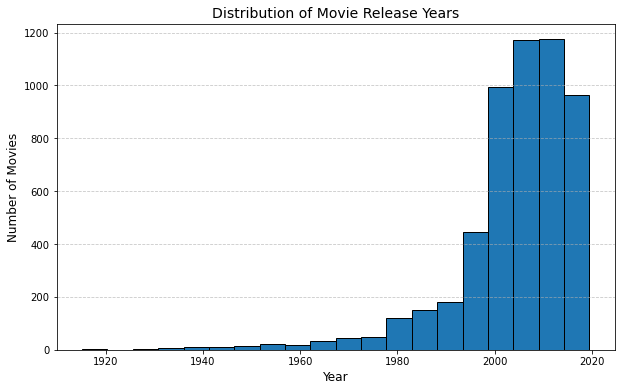

In [11]:
# Plot a histogram
plt.figure(figsize=(10, 6))
plt.hist(df_tn_clean['release_date'], bins=20, edgecolor='black')
plt.title('Distribution of Movie Release Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Focus on movies release from 2010 onwards

- This enable the Numbers data to align well with the Movie data base especially when conducting a join between the two data sets.

In [12]:
# Filtering the data to only include movies from the year 2000 onward

df_tn_clean = df_tn_clean[df_tn_clean['release_date'] > pd.Timestamp(2010, 1, 1)]

# Verify the changes
df_tn_clean['release_date'].describe(datetime_is_numeric=True) # Check the new data frame



count                             1922
mean     2014-04-17 05:01:56.129032192
min                2010-01-08 00:00:00
25%                2011-12-16 00:00:00
50%                2014-04-04 00:00:00
75%                2016-05-13 00:00:00
max                2019-06-21 00:00:00
Name: release_date, dtype: object

## Creating new columns that measure financial success

###  Profit 
- **Formula**: Profit = Worldwide Gross − Production Budget
- It measures the actual monetary gain after covering the production costs and is a direct indicator of how much profit a movie made, which is crucial for understanding its financial success.
  


In [13]:
# Creating a new column that contains profit
df_tn_clean = df_tn_clean.copy()
df_tn_clean['profit'] = df_tn_clean['worldwide_gross'] - df_tn_clean['production_budget']
df_tn_clean

,release_date,movie,production_budget,worldwide_gross,profit
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,1045663875,635063875
2,2019-06-07,Dark Phoenix,350000000,149762350,-200237650
3,2015-05-01,Avengers: Age of Ultron,330600000,1403013963,1072413963
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,1316721747,999721747
5,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,2053311220,1747311220
...,...,...,...,...,...
5740,2010-10-15,Down Terrace,30000,9812,-20188
5744,2017-01-27,Emily,27000,3547,-23453
5748,2015-09-01,Exeter,25000,489792,464792
5760,2010-04-02,Breaking Upwards,15000,115592,100592


## Return on Investment (ROI)

- ROI = profit /cost * 100%
- It measures the profitability of investing in a movie relative to its cost.

In [14]:
# Creating a new column that contains ROI
df_tn_clean['ROI'] = df_tn_clean['profit']/df_tn_clean['production_budget']*100

df_tn_clean

,release_date,movie,production_budget,worldwide_gross,profit,ROI
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,1045663875,635063875,154.667286
2,2019-06-07,Dark Phoenix,350000000,149762350,-200237650,-57.210757
3,2015-05-01,Avengers: Age of Ultron,330600000,1403013963,1072413963,324.384139
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,1316721747,999721747,315.369636
5,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,2053311220,1747311220,571.016739
...,...,...,...,...,...,...
5740,2010-10-15,Down Terrace,30000,9812,-20188,-67.293333
5744,2017-01-27,Emily,27000,3547,-23453,-86.862963
5748,2015-09-01,Exeter,25000,489792,464792,1859.168000
5760,2010-04-02,Breaking Upwards,15000,115592,100592,670.613333


## 2. The Movie DB (DB)

In [15]:
# Reading the csv file
df_db = pd.read_csv('./zippedData/tmdb.movies.csv.gz', index_col = 0, 
                      parse_dates=['release_date'])
df_db

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [16]:
# Lists column names, data types, and non-null counts.
df_db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   genre_ids          26517 non-null  object        
 1   id                 26517 non-null  int64         
 2   original_language  26517 non-null  object        
 3   original_title     26517 non-null  object        
 4   popularity         26517 non-null  float64       
 5   release_date       26517 non-null  datetime64[ns]
 6   title              26517 non-null  object        
 7   vote_average       26517 non-null  float64       
 8   vote_count         26517 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 2.0+ MB


In [17]:
# Summary statistics of the data
df_db.describe()

,id,popularity,vote_average,vote_count
count,26517.000000,26517.000000,26517.000000,26517.000000
mean,295050.153260,3.130912,5.991281,194.224837
std,153661.615648,4.355229,1.852946,960.961095
min,27.000000,0.600000,0.000000,1.000000
25%,157851.000000,0.600000,5.000000,2.000000
50%,309581.000000,1.374000,6.000000,5.000000
75%,419542.000000,3.694000,7.000000,28.000000
max,608444.000000,80.773000,10.000000,22186.000000


## Dropping irrelevant columns

In [18]:
# Creating a list of the columns to drop
columns_to_drop = ['id', 'original_title','popularity']

df_db_clean = df_db.drop(columns=columns_to_drop)

df_db_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   genre_ids          26517 non-null  object        
 1   original_language  26517 non-null  object        
 2   release_date       26517 non-null  datetime64[ns]
 3   title              26517 non-null  object        
 4   vote_average       26517 non-null  float64       
 5   vote_count         26517 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 1.4+ MB


## A histogram showing count of movies through out the years

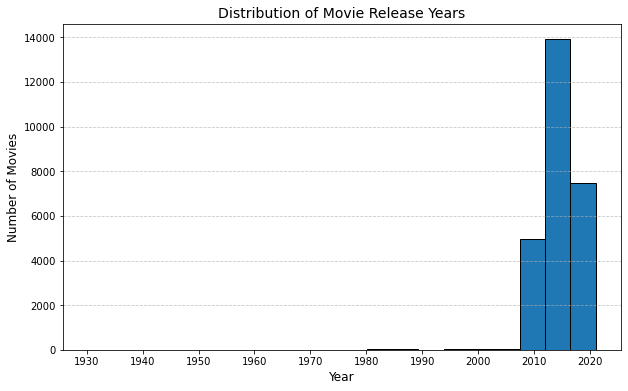

In [19]:
# Plot a histogram
plt.figure(figsize=(10, 6))
plt.hist(df_db_clean['release_date'], bins=20, edgecolor='black')
plt.title('Distribution of Movie Release Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [20]:
# Plotting to show the release years over the time period
df_db_clean['release_date'].describe(datetime_is_numeric=True)

count                            26517
mean     2014-06-10 02:50:14.730173184
min                1930-04-29 00:00:00
25%                2012-06-29 00:00:00
50%                2014-09-19 00:00:00
75%                2016-10-01 00:00:00
max                2020-12-25 00:00:00
Name: release_date, dtype: object

## Focus on movies release from 2010 onwards

- This enable the Movie data to align well with the Numbers data base especially when conducting a join between the two data sets considering the count of movies released.

In [21]:
# Filtering the data to only include movies from the year 2000 onward

df_db_clean = df_db_clean[df_db_clean['release_date'] > pd.Timestamp(2010, 1, 1)]

In [22]:
# Plotting to show the release years over the time period
df_db_clean['release_date'].describe(datetime_is_numeric=True)

count                            26022
mean     2014-09-02 02:22:42.969794560
min                2010-01-02 00:00:00
25%                2012-09-01 00:00:00
50%                2014-10-11 00:00:00
75%                2016-10-14 00:00:00
max                2020-12-25 00:00:00
Name: release_date, dtype: object

In [23]:
# Lists column names, data types, and non-null counts.
df_db_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26022 entries, 0 to 26516
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   genre_ids          26022 non-null  object        
 1   original_language  26022 non-null  object        
 2   release_date       26022 non-null  datetime64[ns]
 3   title              26022 non-null  object        
 4   vote_average       26022 non-null  float64       
 5   vote_count         26022 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 1.4+ MB


## Drop Certain Movies with less votes counts
- Dropping movies with a vote count roughly below the average vote count. i.e 180 votes.

In [24]:
# Summary statistics
df_db_clean['vote_count'].describe()

count    26022.000000
mean       189.232726
std        943.796552
min          1.000000
25%          2.000000
50%          5.000000
75%         28.000000
max      22186.000000
Name: vote_count, dtype: float64

In [25]:
# Filtering the vote_count column
df_db_clean =  df_db_clean[df_db_clean['vote_count'] > 180]

In [26]:
# Rechecking the summary statistics
df_db_clean['vote_count'].describe()

count     2700.000000
mean      1682.864444
std       2467.751359
min        181.000000
25%        332.000000
50%        685.500000
75%       1859.250000
max      22186.000000
Name: vote_count, dtype: float64

## Focus the original language 

- We'll focus on movies with only English as the original language

In [27]:
df_db_clean['original_language'].value_counts()

en    2422
fr      93
ja      38
es      34
it      17
de      14
da      12
sv       8
ko       7
no       7
zh       6
cn       6
hi       5
fa       5
pt       4
id       4
pl       3
nl       2
tr       2
te       2
ar       2
nb       1
uk       1
sr       1
ru       1
fi       1
et       1
hu       1
Name: original_language, dtype: int64

In [28]:
# Filtering the data
df_db_clean = df_db_clean[df_db_clean['original_language'] == 'en']
df_db_clean

,genre_ids,original_language,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",en,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",en,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",en,2010-05-07,Iron Man 2,6.8,12368
4,"[28, 878, 12]",en,2010-07-16,Inception,8.3,22186
5,"[12, 14, 10751]",en,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229
...,...,...,...,...,...,...
24383,[27],en,2018-10-05,Malevolent,5.0,236
24409,"[9648, 53]",en,2017-10-27,All I See Is You,4.9,311
24422,"[35, 18]",en,2018-02-16,The Party,6.4,229
24454,"[27, 53]",en,2017-09-01,The Vault,4.7,187


## Creating a new column containg the primary genre to focus on

In [29]:
# Define a function to extract the first genre ID
def extract_primary_id(genre_ids):
    # Remove unwanted characters and extract the first ID
    char_remove = ["'", " ", "[", "]"]
    for char in char_remove:
        genre_ids = genre_ids.replace(char, '')
    return genre_ids.split(',')[0]

# Use .loc to assign the new column
df_db_clean.loc[:, 'primary_id'] = df_db_clean['genre_ids'].apply(extract_primary_id)

df_db_clean


,genre_ids,original_language,release_date,title,vote_average,vote_count,primary_id
0,"[12, 14, 10751]",en,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,12
1,"[14, 12, 16, 10751]",en,2010-03-26,How to Train Your Dragon,7.7,7610,14
2,"[12, 28, 878]",en,2010-05-07,Iron Man 2,6.8,12368,12
4,"[28, 878, 12]",en,2010-07-16,Inception,8.3,22186,28
5,"[12, 14, 10751]",en,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,12
...,...,...,...,...,...,...,...
24383,[27],en,2018-10-05,Malevolent,5.0,236,27
24409,"[9648, 53]",en,2017-10-27,All I See Is You,4.9,311,9648
24422,"[35, 18]",en,2018-02-16,The Party,6.4,229,35
24454,"[27, 53]",en,2017-09-01,The Vault,4.7,187,27


## Decoding the primary_ids codes 

- We found the below movie genre key on The MovieDB website. The key allows us to convert the primary_ids coding into standard English.

- (found at: https://www.themoviedb.org/talk/5daf6eb0ae36680011d7e6ee)

## Preparing the data for a Join

In [30]:
# Lists column names, data types, and non-null counts.
df_db_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2422 entries, 0 to 24472
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   genre_ids          2422 non-null   object        
 1   original_language  2422 non-null   object        
 2   release_date       2422 non-null   datetime64[ns]
 3   title              2422 non-null   object        
 4   vote_average       2422 non-null   float64       
 5   vote_count         2422 non-null   int64         
 6   primary_id         2422 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 151.4+ KB


In [31]:
# Create a mapping dictionary
genre_mapping = {
    "28": "Action",
    "12": "Adventure",
    "16": "Animation",
    "35": "Comedy",
    "80": "Crime",
    "99": "Documentary",
    "18": "Drama",
    "10751": "Family",
    "14": "Fantasy",
    "36": "History",
    "27": "Horror",
    "10402": "Music",
    "9648": "Mystery",
    "10749": "Romance",
    "878": "Science Fiction",
    "10770": "TV Movie",
    "53": "Thriller",
    "10752": "War",
    "37": "Western"
}

# Replacing primary_id with corresponding genres
df_db_clean['primary_id'] = df_db_clean['primary_id'].map(genre_mapping)

# Renaming the column to 'primary_genre' for better understanding
df_db_clean.rename(columns={'primary_id': 'primary_genre'}, inplace=True)

# Verifying the changes
df_db_clean


,genre_ids,original_language,release_date,title,vote_average,vote_count,primary_genre
0,"[12, 14, 10751]",en,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Adventure
1,"[14, 12, 16, 10751]",en,2010-03-26,How to Train Your Dragon,7.7,7610,Fantasy
2,"[12, 28, 878]",en,2010-05-07,Iron Man 2,6.8,12368,Adventure
4,"[28, 878, 12]",en,2010-07-16,Inception,8.3,22186,Action
5,"[12, 14, 10751]",en,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,Adventure
...,...,...,...,...,...,...,...
24383,[27],en,2018-10-05,Malevolent,5.0,236,Horror
24409,"[9648, 53]",en,2017-10-27,All I See Is You,4.9,311,Mystery
24422,"[35, 18]",en,2018-02-16,The Party,6.4,229,Comedy
24454,"[27, 53]",en,2017-09-01,The Vault,4.7,187,Horror


In [32]:
# Create a copy of the DataFrame `df_db_clean` to avoid modifying the original data
df_db_neat = df_db_clean.copy()

# Rename the column 'title' to 'movie' for better clarity or alignment with the intended structure
df_db_neat.rename(columns={'title': 'movie'}, inplace=True)

# Set the 'movie' column as the index of the DataFrame for easier data access and manipulation
df_db_neat.set_index('movie', inplace=True)

# Display the modified DataFrame
df_db_neat


,genre_ids,original_language,release_date,vote_average,vote_count,primary_genre
movie,,,,,,
Harry Potter and the Deathly Hallows: Part 1,"[12, 14, 10751]",en,2010-11-19,7.7,10788,Adventure
How to Train Your Dragon,"[14, 12, 16, 10751]",en,2010-03-26,7.7,7610,Fantasy
Iron Man 2,"[12, 28, 878]",en,2010-05-07,6.8,12368,Adventure
Inception,"[28, 878, 12]",en,2010-07-16,8.3,22186,Action
Percy Jackson & the Olympians: The Lightning Thief,"[12, 14, 10751]",en,2010-02-11,6.1,4229,Adventure
...,...,...,...,...,...,...
Malevolent,[27],en,2018-10-05,5.0,236,Horror
All I See Is You,"[9648, 53]",en,2017-10-27,4.9,311,Mystery
The Party,"[35, 18]",en,2018-02-16,6.4,229,Comedy


In [33]:
# Lists column names, data types, and non-null counts.
df_tn_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1922 entries, 1 to 5772
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       1922 non-null   datetime64[ns]
 1   movie              1922 non-null   object        
 2   production_budget  1922 non-null   int64         
 3   worldwide_gross    1922 non-null   int64         
 4   profit             1922 non-null   int64         
 5   ROI                1922 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 105.1+ KB


In [34]:
# Create a copy of the DataFrame `df_tn_clean` to avoid modifying the original data
df_tn_neat = df_tn_clean.copy()

# Set the 'movie' column as the index of the DataFrame for better data organization and lookup
df_tn_neat.set_index('movie', inplace=True)

# Remove the 'release_date' column from the DataFrame as it is no longer needed for the analysis
df_tn_neat.drop(columns=['release_date'], inplace=True)

# Display the modified DataFrame
df_tn_neat


,production_budget,worldwide_gross,profit,ROI
movie,,,,
Pirates of the Caribbean: On Stranger Tides,410600000,1045663875,635063875,154.667286
Dark Phoenix,350000000,149762350,-200237650,-57.210757
Avengers: Age of Ultron,330600000,1403013963,1072413963,324.384139
Star Wars Ep. VIII: The Last Jedi,317000000,1316721747,999721747,315.369636
Star Wars Ep. VII: The Force Awakens,306000000,2053311220,1747311220,571.016739
...,...,...,...,...
Down Terrace,30000,9812,-20188,-67.293333
Emily,27000,3547,-23453,-86.862963
Exeter,25000,489792,464792,1859.168000


## Joining Numbers(TN) and Movie (DB) Data

In [35]:
# Perform a join based on the movie index and adding suffixes
combined_df = df_tn_neat.join(df_db_neat, how='inner')
combined_df


,production_budget,worldwide_gross,profit,ROI,genre_ids,original_language,release_date,vote_average,vote_count,primary_genre
movie,,,,,,,,,,
10 Cloverfield Lane,5000000,108286422,103286422,2065.728440,"[53, 878, 18]",en,2016-03-11,6.9,4629,Thriller
12 Strong,35000000,71118378,36118378,103.195366,"[10752, 18, 36, 28]",en,2018-01-19,5.6,1312,War
12 Years a Slave,20000000,181025343,161025343,805.126715,"[18, 36]",en,2013-10-30,7.9,6631,Drama
127 Hours,18000000,60217171,42217171,234.539839,"[12, 18, 53]",en,2010-11-05,7.0,4469,Adventure
13 Hours: The Secret Soldiers of Benghazi,50000000,69411370,19411370,38.822740,"[28, 18, 36, 53, 10752]",en,2016-01-15,7.0,1573,Action
...,...,...,...,...,...,...,...,...,...,...
Zookeeper,80000000,170805525,90805525,113.506906,"[35, 10749, 10751]",en,2011-07-08,5.3,886,Comedy
Zoolander 2,50000000,55348693,5348693,10.697386,[35],en,2016-02-12,4.7,1374,Comedy
Zootopia,150000000,1019429616,869429616,579.619744,"[16, 12, 10751, 35]",en,2016-03-04,7.7,9977,Animation


In [36]:
# Scaling the numerical columns by dividing by 1 million for readability
combined_df['production_budget'] = combined_df['production_budget'] / 1000000  # In millions
combined_df['worldwide_gross'] = combined_df['worldwide_gross'] / 1000000  # In millions
combined_df['profit'] = combined_df['profit'] / 1000000  # In millions

# Showing the updated dataframe
combined_df.head()


,production_budget,worldwide_gross,profit,ROI,genre_ids,original_language,release_date,vote_average,vote_count,primary_genre
movie,,,,,,,,,,
10 Cloverfield Lane,5.0,108.286422,103.286422,2065.728440,"[53, 878, 18]",en,2016-03-11,6.9,4629,Thriller
12 Strong,35.0,71.118378,36.118378,103.195366,"[10752, 18, 36, 28]",en,2018-01-19,5.6,1312,War
12 Years a Slave,20.0,181.025343,161.025343,805.126715,"[18, 36]",en,2013-10-30,7.9,6631,Drama
127 Hours,18.0,60.217171,42.217171,234.539839,"[12, 18, 53]",en,2010-11-05,7.0,4469,Adventure
13 Hours: The Secret Soldiers of Benghazi,50.0,69.411370,19.411370,38.822740,"[28, 18, 36, 53, 10752]",en,2016-01-15,7.0,1573,Action


In [37]:

print(combined_df[['production_budget', 'profit']].describe())
print(combined_df[['production_budget', 'profit']].isnull().sum())


       production_budget       profit
count        1391.000000  1391.000000
mean           51.040714   116.135429
std            57.457317   204.889569
min             0.100000  -110.450242
25%            12.000000     3.888374
50%            30.000000    40.282881
75%            65.000000   129.748880
max           410.600000  1748.134200
production_budget    0
profit               0
dtype: int64


## Filter the DataFrame `combined_df` to include only rows where the 'profit' column has positive values

In [38]:
# Filter the DataFrame `combined_df` to include only rows where the 'profit' column has positive values
combined_df = combined_df[combined_df['profit'] > 0]

# Print the descriptive statistics for the 'production_budget' and 'profit' columns 
# to understand their distribution, including metrics like mean, standard deviation, min, max, etc.
print(combined_df[['production_budget', 'profit']].describe())


       production_budget       profit
count        1114.000000  1114.000000
mean           56.376825   147.862544
std            60.667416   217.536682
min             0.100000     0.009644
25%            13.000000    21.527604
50%            34.000000    64.383421
75%            77.875000   163.581080
max           410.600000  1748.134200


In [39]:
# Lists column names, data types, and non-null counts.
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1114 entries, 10 Cloverfield Lane to xXx: Return of Xander Cage
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   production_budget  1114 non-null   float64       
 1   worldwide_gross    1114 non-null   float64       
 2   profit             1114 non-null   float64       
 3   ROI                1114 non-null   float64       
 4   genre_ids          1114 non-null   object        
 5   original_language  1114 non-null   object        
 6   release_date       1114 non-null   datetime64[ns]
 7   vote_average       1114 non-null   float64       
 8   vote_count         1114 non-null   int64         
 9   primary_genre      1114 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(3)
memory usage: 95.7+ KB


## Movie Release Timing

- Here we'll visualize the most profitable months to release a movie

In [40]:
# Creating a new column for the release month
# Copying the dataframe to avoid errors
combined_df = combined_df.copy()

combined_df['release_month'] = combined_df['release_date'].dt.month

# Group by month to calculate average profit, ROI, and worldwide gross
month_analysis = combined_df.groupby('release_month').agg({
    'profit': 'mean'
}).rename(columns={
    'profit': 'avg_profit'
}).reset_index()

# Sort the results for better readability
month_analysis = month_analysis.sort_values(by='release_month')

# Display the results
print("Average performance by release month:")
month_analysis


Average performance by release month:


,release_month,avg_profit
0,1,84.785980
1,2,145.097262
2,3,149.109586
3,4,124.655972
4,5,215.890930
5,6,236.867675
6,7,187.758444
7,8,84.029765
8,9,86.458373
9,10,94.834217


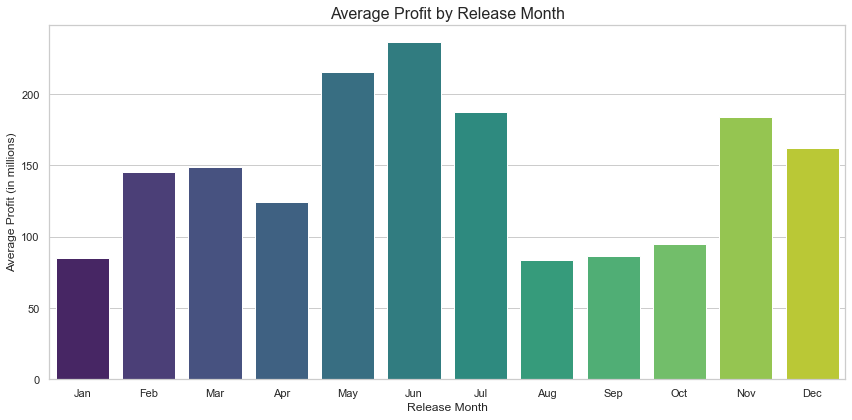

In [41]:
# Set plot style
sns.set(style="whitegrid")

# Bar chart for average profit by month
plt.figure(figsize=(12, 6))
sns.barplot(x='release_month', y='avg_profit', data=month_analysis, palette='viridis')
plt.title('Average Profit by Release Month', fontsize=16)
plt.xlabel('Release Month', fontsize=12)
plt.ylabel('Average Profit (in millions)', fontsize=12)
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()


## Grouping the combined data to show genre performance

In [42]:
# Group by primary genre and aggregate by mean ROI and profit
genre_performance = combined_df.groupby('primary_genre')[['ROI', 'profit', 'production_budget', 'worldwide_gross']].mean()
genre_performance

,ROI,profit,production_budget,worldwide_gross
primary_genre,,,,
Action,246.883006,240.217183,98.569333,338.786516
Adventure,234.794563,278.605929,121.910843,400.516772
Animation,313.389362,326.215247,106.956522,433.171769
Comedy,303.097801,72.788430,29.904082,102.692512
Crime,257.324474,83.749472,33.938039,117.687511
Documentary,604.501337,33.483595,5.333333,38.816928
Drama,436.193288,78.555863,26.605276,105.161139
Family,329.761515,276.843604,68.281250,345.124854
Fantasy,199.168408,141.904777,88.696296,230.601073


In [43]:
# Sort the genres by profit to identify the best performers
genre_performance_sorted_by_profit = genre_performance.sort_values('profit', ascending=False)

genre_performance_sorted_by_profit

,ROI,profit,production_budget,worldwide_gross
primary_genre,,,,
Western,294.769113,397.938302,135.000000,532.938302
Animation,313.389362,326.215247,106.956522,433.171769
Adventure,234.794563,278.605929,121.910843,400.516772
Family,329.761515,276.843604,68.281250,345.124854
Science Fiction,399.380618,271.007490,96.822222,367.829713
Action,246.883006,240.217183,98.569333,338.786516
War,335.912345,227.454521,67.642857,295.097378
Fantasy,199.168408,141.904777,88.696296,230.601073
Mystery,866.679643,105.145070,29.861538,135.006608


## A Bar plot showing the top 10 genres by Net Profit

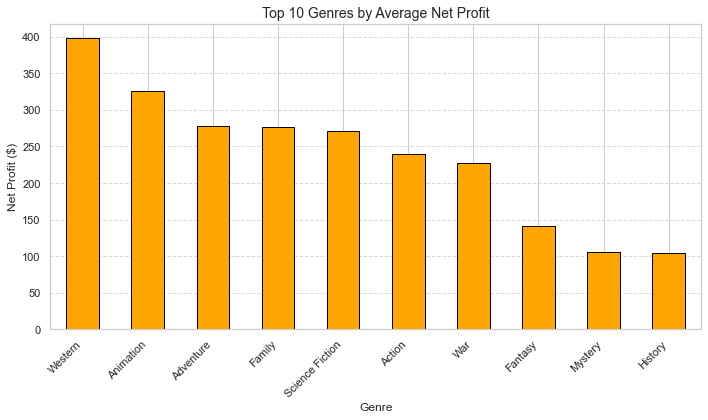

In [44]:
# Plotting top genres by Net Profit
plt.figure(figsize=(10, 6))
genre_performance_sorted_by_profit['profit'].head(10).plot(kind='bar', color='orange', edgecolor='black')
plt.title('Top 10 Genres by Average Net Profit', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Net Profit ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [45]:
# Sort the genres by ROI to identify the best performers
genre_performance_sorted_by_roi = genre_performance.sort_values('ROI', ascending=False)


genre_performance_sorted_by_roi 

,ROI,profit,production_budget,worldwide_gross
primary_genre,,,,
Horror,1757.676050,84.512287,14.679730,99.192016
Mystery,866.679643,105.145070,29.861538,135.006608
Documentary,604.501337,33.483595,5.333333,38.816928
Thriller,565.686747,89.436631,33.466393,122.903025
History,475.598383,104.307712,31.333333,135.641046
Drama,436.193288,78.555863,26.605276,105.161139
Science Fiction,399.380618,271.007490,96.822222,367.829713
War,335.912345,227.454521,67.642857,295.097378
Romance,332.478714,94.304119,27.960000,122.264119


## A Bar plot showing the top 10 genres by ROI

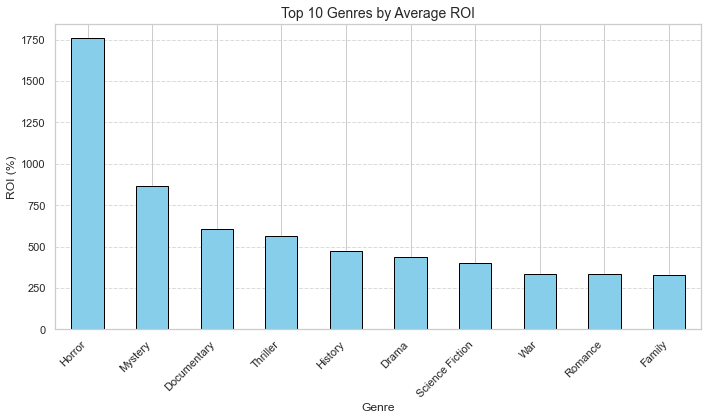

In [46]:
# Plotting top genres by ROI
plt.figure(figsize=(10, 6))
genre_performance_sorted_by_roi['ROI'].head(10).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Genres by Average ROI', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('ROI (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Calculating the correlation between numerical columns


In [47]:
combined_df[['production_budget', 'worldwide_gross', 'profit']].corr()


,production_budget,worldwide_gross,profit
production_budget,1.000000,0.786251,0.668008
worldwide_gross,0.786251,1.000000,0.985040
profit,0.668008,0.985040,1.000000


The correlation table summarizes the relationships between the variables **`production_budget`**, **`worldwide_gross`**, and **`profit`**:

1. **`production_budget` and `worldwide_gross`**:  
   - Correlation coefficient: **0.786**  
   - This indicates a strong positive relationship. Higher production budgets are generally associated with higher worldwide gross revenues.

2. **`production_budget` and `profit`**:  
   - Correlation coefficient: **0.668**  
   - This shows a moderate positive relationship. Higher production budgets tend to result in higher profits, although the relationship is weaker compared to that with worldwide gross.

3. **`worldwide_gross` and `profit`**:  
   - Correlation coefficient: **0.985**  
   - This represents a very strong positive relationship. As worldwide gross increases, profit also increases substantially, which is expected since profit is derived from revenue minus production costs.

### Key Insights:
- The strongest relationship exists between **`worldwide_gross`** and **`profit`**, highlighting the direct impact of revenue on profitability.
- While production budget correlates positively with both worldwide gross and profit, the relationships are less pronounced, suggesting that other factors (e.g., marketing, audience reception) also play a significant role.

 ## A heatmap showing the correlation

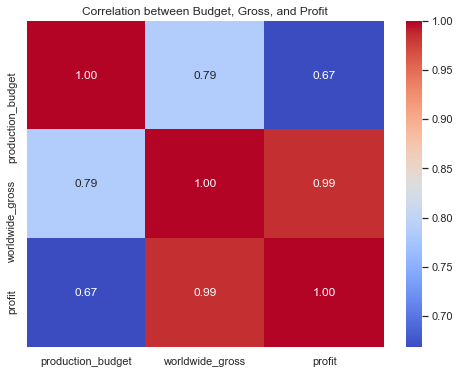

In [48]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(combined_df[['production_budget', 'worldwide_gross', 'profit']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Budget, Gross, and Profit')
plt.show()


## A scatter plot showing the relationship between the production budget and the worldwide gross

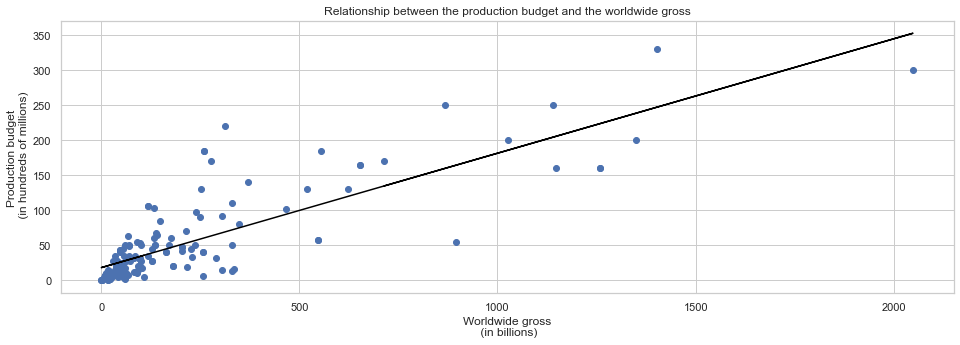

In [49]:
fig, ax2 = plt.subplots(figsize=(16, 5))
x = combined_df["worldwide_gross"][:150]
y = combined_df["production_budget"][:150]

# Scatter plot
ax2.scatter(x, y)

# Fit a linear regression line
a, b = np.polyfit(x, y, 1)
plt.plot(x, a*x + b, color="black")

# Set title and labels
ax2.set_title("Relationship between the production budget and the worldwide gross")
ax2.set_ylabel("Production budget \n (in hundreds of millions)")
ax2.set_xlabel("Worldwide gross\n (in billions)")

plt.show()


- A correlation coefficient of 0.79 indicates a high level of correlation between the worldwide gross and the production budget. Because of this we reccommend a high production budget of the range between 50 - 100 million dollars.


## 3. IMBD Database

In [50]:
# Define the path to the zip file and the extraction folder
zip_file_path = "zippedData/im.db.zip"
extraction_folder = "zippedData"


# Ensure the extraction folder exists
os.makedirs(extraction_folder, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_folder)
    

print(f"Extracted all files to: {extraction_folder}")

Extracted all files to: zippedData


In [51]:
# Establish a connection to the SQLite database stored in the file 'zippedData/im.db'
conn = sqlite3.connect('zippedData/im.db')

# Define an SQL query to retrieve information about all the tables in the database
q = """  SELECT * 
         FROM sqlite_master; """

# Execute the SQL query using pandas' read_sql function and store the result in a DataFrame called 'tables'
tables = pd.read_sql(q, conn)

# Display the DataFrame containing metadata about the tables in the database
tables


,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


## Movie Basics Table

In [52]:
# Previewing the table
q = """  SELECT * 
         FROM movie_basics; """

movie_basics = pd.read_sql(q , conn)
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


## Movie Ratings Table

In [53]:
# Previewing the table
q = """  SELECT * 
         FROM movie_ratings; """

movie_ratings = pd.read_sql(q , conn)
movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


## Joining the two tables

In [54]:

# Previewing the table
q = """  
    SELECT 
    mb.movie_id AS movie_id, 
    mb.primary_title,
    mb.genres,
    mb.start_year, 
    mb.runtime_minutes, 
    mr.averagerating, 
    mr.numvotes
FROM movie_basics mb
LEFT JOIN movie_ratings mr
ON mb.movie_id = mr.movie_id; """

movie_br = pd.read_sql(q , conn)
movie_br

,movie_id,primary_title,genres,start_year,runtime_minutes,averagerating,numvotes
0,tt0063540,Sunghursh,"Action,Crime,Drama",2013,175.0,7.0,77.0
1,tt0066787,One Day Before the Rainy Season,"Biography,Drama",2019,114.0,7.2,43.0
2,tt0069049,The Other Side of the Wind,Drama,2018,122.0,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,"Comedy,Drama",2018,NaN,6.1,13.0
4,tt0100275,The Wandering Soap Opera,"Comedy,Drama,Fantasy",2017,80.0,6.5,119.0
...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Drama,2019,123.0,NaN,NaN
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Documentary,2015,NaN,NaN,NaN
146141,tt9916706,Dankyavar Danka,Comedy,2013,NaN,NaN,NaN
146142,tt9916730,6 Gunn,None,2017,116.0,NaN,NaN


In [55]:
# Check for missing values
movie_br.isnull().sum()


movie_id               0
primary_title          0
genres              5408
start_year             0
runtime_minutes    31739
averagerating      72288
numvotes           72288
dtype: int64

In [56]:
# Remove rows from the DataFrame 'movie_br' that have missing values in the specified columns:
movie_br = movie_br.dropna(subset=['runtime_minutes', 'averagerating', 'numvotes', 'genres'])

# Check for remaining missing values in the DataFrame after dropping rows.
movie_br.isnull().sum()


movie_id           0
primary_title      0
genres             0
start_year         0
runtime_minutes    0
averagerating      0
numvotes           0
dtype: int64

## Filtering the runtime column
- This process filters out extreme outliers

In [57]:
# Viweing the max duration of a movie
max_min = movie_br['runtime_minutes'].max()
 
mean_min = movie_br['runtime_minutes'].mean()
 
mean_min, max_min

(94.7322732805843, 51420.0)

In [58]:
# We'll need to exclude such extreme cases.
movie_br[movie_br['runtime_minutes'] == 51420.0]


,movie_id,primary_title,genres,start_year,runtime_minutes,averagerating,numvotes
132389,tt8273150,Logistics,Documentary,2012,51420.0,5.0,17.0


In [59]:
# Filtering the data to include movies with reasonable runtime i.e 2 hrs 30 mins
movie_br = movie_br[movie_br['runtime_minutes'] < 150 ]  #  Threshold for excluding outliers

movie_br['runtime_minutes'].max()

149.0

In [60]:
# Lists column names, data types, and non-null counts.
movie_br.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64208 entries, 1 to 146134
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         64208 non-null  object 
 1   primary_title    64208 non-null  object 
 2   genres           64208 non-null  object 
 3   start_year       64208 non-null  int64  
 4   runtime_minutes  64208 non-null  float64
 5   averagerating    64208 non-null  float64
 6   numvotes         64208 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 3.9+ MB


In [61]:
# Create a copy of the DataFrame `movie_br` to avoid modifying the original data
movie_br = movie_br.copy()

# Create a new column 'primary_genre' by extracting the first genre from the 'genres' column.
# The lambda function splits the 'genres' string by commas and selects the first element.
movie_br["primary_genre"] = movie_br["genres"].apply(lambda x: x.split(",")[0])

# Display the modified DataFrame to verify the changes
movie_br


,movie_id,primary_title,genres,start_year,runtime_minutes,averagerating,numvotes,primary_genre
1,tt0066787,One Day Before the Rainy Season,"Biography,Drama",2019,114.0,7.2,43.0,Biography
2,tt0069049,The Other Side of the Wind,Drama,2018,122.0,6.9,4517.0,Drama
4,tt0100275,The Wandering Soap Opera,"Comedy,Drama,Fantasy",2017,80.0,6.5,119.0,Comedy
7,tt0137204,Joe Finds Grace,"Adventure,Animation,Comedy",2017,83.0,8.1,263.0,Adventure
10,tt0146592,Pál Adrienn,Drama,2010,136.0,6.8,451.0,Drama
...,...,...,...,...,...,...,...,...
146113,tt9911774,Padmavyuhathile Abhimanyu,Drama,2019,130.0,8.4,365.0,Drama
146114,tt9913056,Swarm Season,Documentary,2019,86.0,6.2,5.0,Documentary
146115,tt9913084,Diabolik sono io,Documentary,2019,75.0,6.2,6.0,Documentary
146122,tt9914286,Sokagin Çocuklari,"Drama,Family",2019,98.0,8.7,136.0,Drama


In [62]:
# Checking the value counts
movie_br['primary_genre'].value_counts()

Drama          16383
Comedy         12783
Documentary    12511
Action          5859
Horror          3923
Biography       3266
Adventure       2429
Crime           2297
Thriller        1276
Animation        861
Romance          544
Family           516
Fantasy          377
Mystery          373
Sci-Fi           320
Music            136
Musical          102
History           91
Sport             64
Western           62
War               30
News               2
Adult              1
Reality-TV         1
Game-Show          1
Name: primary_genre, dtype: int64

In [63]:
# Lists column names, data types, and non-null counts.
movie_br.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64208 entries, 1 to 146134
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         64208 non-null  object 
 1   primary_title    64208 non-null  object 
 2   genres           64208 non-null  object 
 3   start_year       64208 non-null  int64  
 4   runtime_minutes  64208 non-null  float64
 5   averagerating    64208 non-null  float64
 6   numvotes         64208 non-null  float64
 7   primary_genre    64208 non-null  object 
dtypes: float64(3), int64(1), object(4)
memory usage: 4.4+ MB


## Genres with Highest Average Ratings

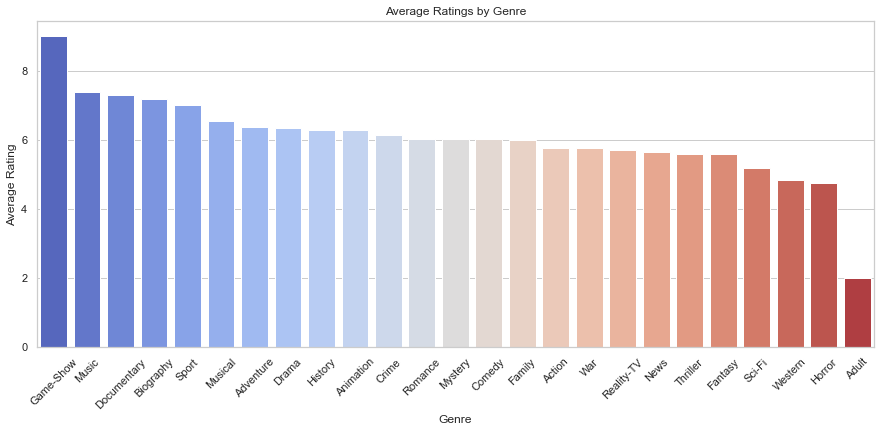

In [64]:
# Genres with Highest Average Ratings
plt.figure(figsize=(15, 6))
avg_rating_by_genre = movie_br.groupby('primary_genre')['averagerating'].mean().sort_values(ascending=False)
sns.barplot(x=avg_rating_by_genre.index, y=avg_rating_by_genre.values, palette='coolwarm')
plt.title('Average Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

In [65]:
# Showing the values
avg_rating_by_genre

primary_genre
Game-Show      9.000000
Music          7.377941
Documentary    7.293494
Biography      7.178077
Sport          6.990625
Musical        6.549020
Adventure      6.370441
Drama          6.339321
History        6.279121
Animation      6.266783
Crime          6.139878
Romance        6.027757
Mystery        6.024665
Comedy         6.005515
Family         5.991085
Action         5.762946
War            5.746667
Reality-TV     5.700000
News           5.650000
Thriller       5.590517
Fantasy        5.584881
Sci-Fi         5.168750
Western        4.833871
Horror         4.748968
Adult          2.000000
Name: averagerating, dtype: float64

## Trends in Movie Runtime

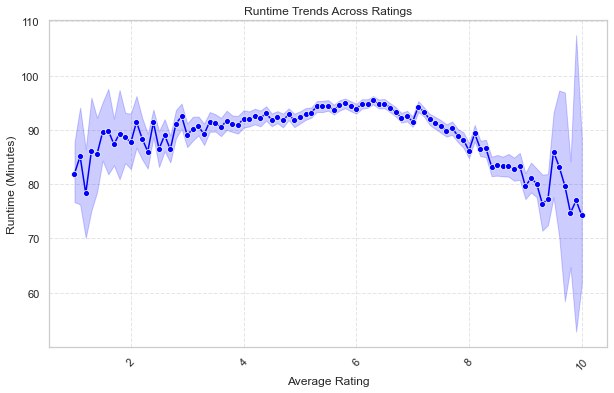

In [66]:
plt.figure(figsize=(10, 6))

# Create a line plot for runtime trends across ratings
sns.lineplot(
    x=movie_br['averagerating'],
    y=movie_br['runtime_minutes'],
    color='blue',
    marker='o'
)

plt.title('Runtime Trends Across Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Runtime (Minutes)')
plt.xticks(rotation=45)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()


## Data Modeling

In [67]:
# Ensure combined_df is a standalone copy to avoid SettingWithCopyWarning
combined_df = combined_df.copy()

# Apply log transformation to relevant features in the dataset
combined_df['log_budget'] = np.log1p(combined_df['production_budget'])
combined_df['log_profit'] = np.log1p(combined_df['profit'])


# Define features (independent variables) and target variable (dependent variable)
X = combined_df[['log_budget', 'log_profit']]  # Use transformed variables
y = combined_df['ROI']  # Assuming you want to predict ROI

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output results
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 235680.34
R² Score: 0.43




### Data Analysis and Modeling Process 

#### **1. Analyzing the Data**
To solve the problem of understanding factors contributing to movie success at the box office, I conducted the following steps:

- **Exploratory Data Analysis (EDA)**: I analyzed the dataset's structure and summary statistics previously, noting:
  - Presence of zero or negative values in the `profit` column.
  - Significant variation and outliers in the values.

- **Data Cleaning**: I addressed these issues previously:
  - Filtering out negative values in the `profit` column (due to the limitations of log transformation).
  - Removing missing values (NaNs) in essential columns like `production_budget` and `profit`.

#### **2. Data Transformation**
- **Log Transformation**: I applied a logarithmic transformation (`np.log1p`) to the `production_budget` and `profit` columns. This reduced the impact of outliers and normalized the distributions, making them more linear for linear regression modeling.

#### **3. Feature Selection**
- I selected `log_budget` and `log_profit` as features because they directly relate to movie costs and profitability, making them strong predictors of ROI.

#### **4. Model Selection**
- **Linear Regression** was chosen for its simplicity and interpretability. It is suitable for modeling linear relationships and understanding how features (budget, profit) influence the target variable (ROI).

#### **5. Model Evaluation**
- I evaluated the model using:
  - **Mean Squared Error (MSE)**: Indicates the accuracy of predictions (lower is better).
  - **R² Score**: Shows how much of the variance in ROI is explained by the model (higher is better).

#### **6. Iteration and Improvement**
- **Data Transformation**: I ensured the data was transformed appropriately to fit the linear regression model.
- **Addressing Warnings**: Used `.loc[]` to avoid the `SettingWithCopyWarning` during assignments.

#### **7. Results**
- The model achieved an **R² Score of 0.43**, explaining 43% of the variability in ROI.
- The **MSE** of 235,680.34 suggests room for model improvement.


### **Relevance of the Modeling process**

1. **Business Relevance**: The chosen features (`production_budget`, `profit`) are key factors in movie success, and understanding their impact helps make data-driven decisions.
2. **Linear Regression**: This simple model allows us to interpret how budget and profit influence ROI, making it accessible for business stakeholders.
3. **Log Transformation**: This technique ensures more linear relationships between variables, improving the effectiveness of the regression model.



### **Conclusions**

Based on the analysis, the following recommendations and insights have been derived:  

1. **Recommendations for the Business:**  
   - Focus on producing movies in high profitable genres like Western, Animation, Adventure, Family and Science Fiction .
   - Allocate production budgets strategically within a range that balances profitability and risk i.e. Consider the budget range between 50 to 100 million dollars.
   - Time movie releases during peak seasons such as summer and the holiday months to maximize box office success.
       Summer: June and July
       Winter: December
   - Consider creating films with runtimes aligned with audience preferences (e.g., around 90–120 minutes), ensuring they maintain engagement and align with critical reception trends.  
   - Leverage insights into audience ratings to produce quality films that resonate with viewers, building long-term loyalty and enhancing the studio’s reputation.  

2. **Limitations of the Analysis:**  
   - **Data Gaps:** Missing or incomplete data on production budgets, revenues, and other key attributes may limit the accuracy of conclusions.  
   - **Historical Bias:** The analysis relies on historical data, which may not account for shifting audience preferences or emerging genres.  
   - **Multilabel Genres:** Movies belonging to multiple genres could dilute the financial and audience impact attributed to a specific genre.  

3. **Next Steps for Improvement:**  
   - **Enhance Data Quality:** Fill in missing data, standardize formats across sources, and adjust for inflation to ensure more accurate comparisons.  
   - **Incorporate Marketing Metrics:** Include data on advertising budgets, promotional strategies, and audience engagement to provide a more holistic view of a movie's success.  
   - **Analyze Regional Trends:** Study regional performance trends to tailor strategies for different markets.  
   - **Explore Streaming Impact:** With the rise of streaming platforms, consider how simultaneous theatrical and online releases affect profitability.  
   - **Machine Learning Models:** Build predictive models to forecast box office success based on key variables like budget, genre, and release timing.  
